In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [9]:
# Function to read MNIST data from CSV filey
def read_mnist_csv(filename):
    return pd.read_csv(filename, header=None).values[:, 1:]  # Exclude the label column

# Path to the MNIST dataset
data_path = "mnist_dataset"

# Read MNIST train and test images from CSV files
train_images = read_mnist_csv(os.path.join(data_path, 'mnist_train.csv'))
test_images = read_mnist_csv(os.path.join(data_path, 'mnist_test.csv'))

"""
print(train_images.shape) = (60000, 784)

"""

'\nprint(train_images.shape) = (60000, 784)\n\n'

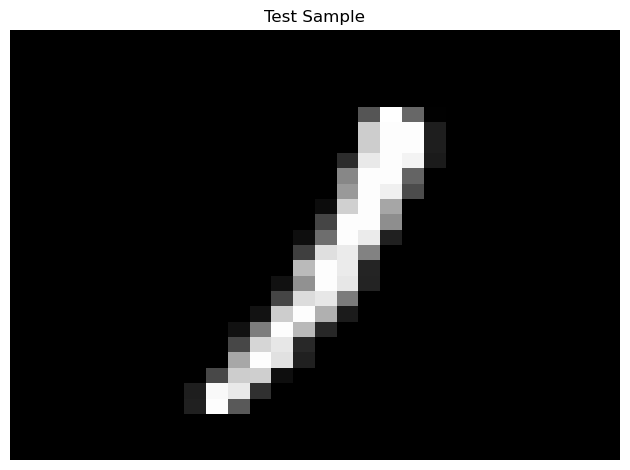

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  85 255 103   1   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 205 253 253  30   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 205 253 253  30
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  44 233 253 244  27   0   0   

In [16]:
Test_sample = train_images[99]

# image show Test_sample
plt.imshow(Test_sample.reshape(-28, 28), cmap='gray', aspect = 'auto')
plt.title(f'Test Sample')
plt.axis('off')
plt.tight_layout()
plt.show()

print(Test_sample)

In [17]:
# count the number of non-zero entries in Test_sample
print(np.count_nonzero(Test_sample))

84


In [18]:
# Generate fat random matrices with varying numbers of columns M
def generate_random_matrix(M, n_cols):
    # Generate a random matrix with elements from a Gaussian distribution N(0, 1/M)
    matrix = np.random.normal(loc=0, scale=1/np.sqrt(M), size=(M, n_cols))
    
    # Normalize each column vector to ensure its L2 norm is 1
    for i in range(n_cols):
        column = matrix[:, i]
        matrix[:, i] = column / np.linalg.norm(column)
    
    return matrix

def orthogonal_matching_pursuit(A, y, max_iter = 500):
    """
    Orthogonal Matching Pursuit
    """
    z = np.zeros(A.shape[1])
    r = y
    support = []  # Support set
    
    
    for _ in range(max_iter):
        # Compute the correlation of the residual with each column of A
        correlations = np.abs(np.dot(A.T, r))
        # Find the index of the column with the maximum correlation
        j = np.argmax(correlations)  
        # Update the support set
        support.append(j)
        sub_A = A[:, support]
        # update z
        z[support] = np.linalg.inv(np.dot(sub_A.T, sub_A)).dot(sub_A.T).dot(y)
        # update r
        r = y - np.dot(A, z)
        # #Check the stopping criterion
        # if np.linalg.norm(r) < error:
        #     break
    return z

In [20]:
np.random.seed(42)  # set the random seed
M = 400 # number of measurements
A = generate_random_matrix(M, 784)
y = np.dot(A, Test_sample)

estimated_x = orthogonal_matching_pursuit(A, y, max_iter=M)
# reshape estimated_x to 28x28 image
plt.imshow(estimated_x.reshape(-28, 28), cmap='gray', aspect='auto')
plt.title(f'estimated_x with M = {M} measurements')
plt.axis('off')
plt.show()               


LinAlgError: Singular matrix

In [21]:
# count the number of non-zero entries in Test_sample
print(np.count_nonzero(estimated_x))

400


0
1
2
3
4
5
6
7
8
9
10


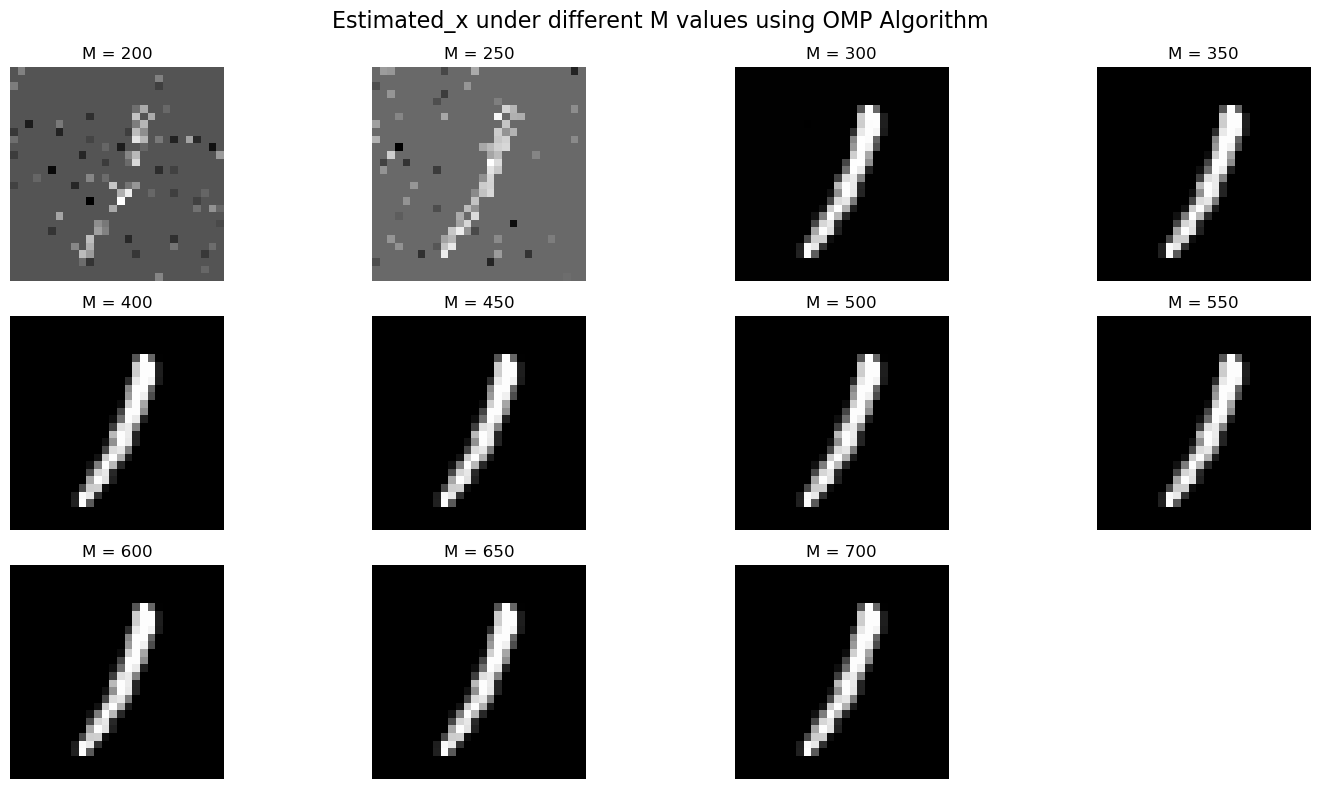

In [24]:
# Define your functions generate_random_matrix and orthogonal_matching_pursuit here

np.random.seed(42)  # set the random seed

# Number of measurements
M = [200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]
MSE = []
Recovered_x = []
for i in range(len(M)):  
    A = generate_random_matrix(M[i], 784)
    y = np.dot(A, Test_sample)
    estimated_x = orthogonal_matching_pursuit(A, y, max_iter=84)
    Recovered_x.append(estimated_x)
    diff = Test_sample - estimated_x
    diff = diff / 255
    MSE.append(np.linalg.norm(diff))
    print(i)

# Reshape estimated_x to 28x28 image and plot
plt.figure(figsize=(15, 8))
for i in range(len(M)):
    plt.subplot(3, 4, i+1)
    plt.imshow(Recovered_x[i].reshape(28, 28), cmap='gray')
    plt.title(f'M = {M[i]}')
    plt.axis('off')

plt.suptitle('Estimated_x under different M values using OMP Algorithm', fontsize=16)
plt.tight_layout()
plt.show()

In [25]:
print(MSE)

[6.132568758419842, 4.535209774496445, 0.08381480036502342, 4.086733553384773e-15, 4.24221511393744e-15, 2.985953898021861e-15, 2.700603670556502e-15, 2.9024162602249514e-15, 2.8967362663275335e-15, 2.980226434087928e-15, 2.5443836515696244e-15]


NameError: name 'M' is not defined